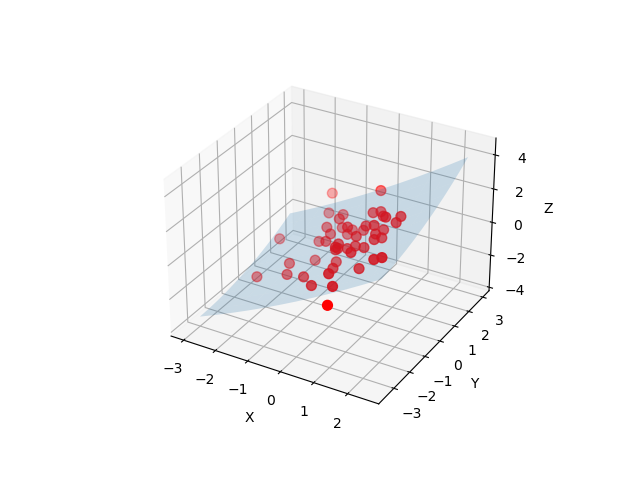

In [3]:
# based upon
# https://stackoverflow.com/questions/72320274/how-to-fit-a-curved-surface-to-a-set-of-data-points-and-obtain-the-equation-for

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

%matplotlib widget

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 50)

# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()


# best-fit quadratic curve
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])

# evaluate it on a grid
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('auto')
ax.axis('tight')
plt.show()

# additional reading to consider 
# https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib